# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [109]:
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [110]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

# I will clean up the data later, when I begin analyzing a specific variable
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *Grade 4 Reading*

How many years of data are logged in our dataset? 

In [111]:
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)

print(df["YEAR"].nunique(), " years:")
df["YEAR"].unique()

14  years:


array([1992, 1994, 1998, 2002, 2003, 2005, 2007, 2009, 2011, 2013, 2015,
       2017, 2000, 2019])

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [102]:
avgAllYears = df.groupby("STATE")["AVG_READING_4_SCORE"].mean()
print("Michigan: ", avgAllYears["MICHIGAN"], "\nOhio: ", avgAllYears["OHIO"])

# Ohio has the higher avg outcome score across all years (see output below)

Michigan:  217.83333333333334 
Ohio:  223.1818181818182


Find the average for your outcome score across all states in 2019

In [103]:
avg2019 = df[df["YEAR"] == 2019]["AVG_READING_4_SCORE"].mean()
avg2019

219.79245283018867

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [105]:
maxPerState = df.groupby("STATE")["AVG_READING_4_SCORE"].max()

maxPerState

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [112]:
df["AVG_OVERALL_4_SCORE"] = df["AVG_MATH_4_SCORE"] + df["AVG_READING_4_SCORE"]

df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,AVG_OVERALL_4_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,415.0
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,424.0
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,421.0
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,410.0
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,438.0


Feature engineering justification: **I'm curious to see the relationship between overall academic performance and expenditure, as well as time, and in order to see any trends, I need to combine the data regarding average scores for reading and math (since I'm not trying to compare the scores in the different subjects, but rather the total scores with the contexts therein).**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, '4th Grade Overall Score Over Time')

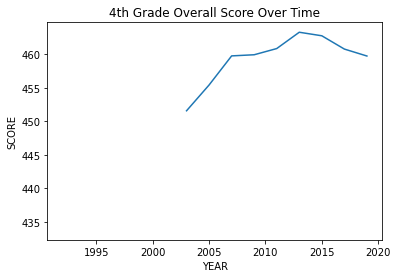

In [113]:
df.groupby("YEAR")["AVG_OVERALL_4_SCORE"].mean().plot()
plt.ylabel("SCORE")
plt.title("4th Grade Overall Score Over Time")

**We can see above that 4th graders performed best on tests between 2010 and 2015. In order to take more from this plot, we'd need to study the tests that were administered; it could be the case that teaching methods got better over time, but it could also be true that the tests simply became easier (eg. the method of testing changed).**

**Visualization 2**

Text(0, 0.5, 'Grade 4 Overall Score')

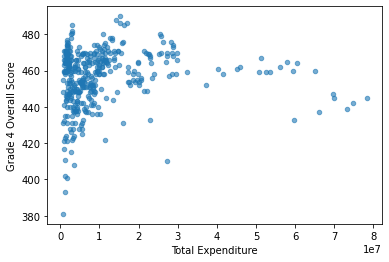

In [120]:
df.plot.scatter(x="TOTAL_EXPENDITURE", y="AVG_OVERALL_4_SCORE", alpha=0.6)
plt.xlabel("Total Expenditure")
plt.ylabel("Grade 4 Overall Score")

**From the above scatterplot, we can conclude that total expenditure didn't have much impact on the academic performance of 4th graders; both the maximum and minimum score values are both between $0 and $10,000,000. This makes me wonder what the funds were spent on in the cases where expenditure is greater than $50,000,000, and if they were spent on some effort to increase scores or something else.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [127]:
from sklearn.model_selection import train_test_split

In [170]:
df = df.dropna()
X = df[["YEAR", "AVG_MATH_8_SCORE"]].dropna()
y = df.loc[X.index]["AVG_OVERALL_4_SCORE"]

In [171]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [172]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [173]:
# create your model here
model = LinearRegression()

In [174]:
model.fit(X_train, y_train)

LinearRegression()

In [175]:
y_pred = model.predict(X_test)
y_pred

array([478.80470508, 439.02677526, 461.14987033, 474.1005993 ,
       457.70521885, 467.25140988, 461.38571578, 457.70521885,
       465.20419219, 463.9447379 , 432.55141078, 462.92112905,
       468.64884367, 451.87963828, 455.42215571, 451.87963828,
       464.45654232, 465.20419219, 470.04627745, 463.9447379 ,
       435.85808277, 464.83036725, 470.42010238, 457.19341443,
       467.11343039, 473.21496995, 479.3165095 , 467.25140988,
       454.39854687, 452.11548373, 467.62523482, 443.21907661,
       464.45654232, 472.1913611 , 462.40932462, 444.61651039,
       450.20624552, 472.70316552, 457.70521885, 445.12831482,
       436.36988719, 457.19341443, 472.32934059, 448.57296629,
       456.07193963, 465.71599661, 440.93601347, 459.98828199,
       464.18058334, 470.42010238, 478.43088014, 474.61240373,
       456.44576456, 461.8975202 , 478.43088014, 453.27707206,
       436.2319077 , 462.03549969, 450.71804994, 449.45859565,
       457.70521885, 458.59084821, 448.06116187, 464.69

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [182]:
print("R^2 value: ", model.score(X_test, y_test))
print("mean error: ", np.mean(model.predict(X_test)-y_test))
print("mean absolute error: ", np.mean(np.abs(model.predict(X_test)-y_test)))
print("root mean sq. error: ", np.mean((model.predict(X_test)-y_test)**2)**0.5)

R^2 value:  0.807092441501009
mean error:  -0.6179348481541521
mean absolute error:  4.082748935257332
root mean sq. error:  5.23936729672646


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

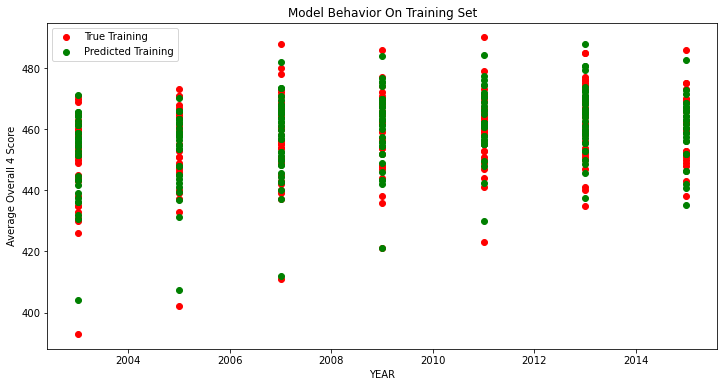

In [186]:
col_name = 'YEAR'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average Overall 4 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

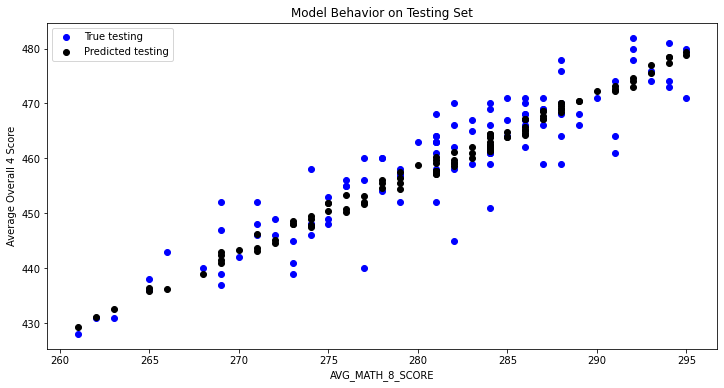

In [190]:
col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average Overall 4 Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

I decided to build a model that predicts overall 4th grade scores based on the year and the 8th grade math scores of that year (I did not want to continue working with total expenditure data like I had in the Visualization section of this notebook because there wasn't really a discernible trend therein). 

It seems that my model works pretty well on the training set (with an R^2 value of approx. 0.81). From the data visualization plots above, we can also see that the model works well on the testing set, following the trends of the data and achieving predicted values within the range of the actual values in the dataset. It does not seem that the model overfits (the R^2 value is not overly high, nor are the mean errors too low), however further analysis would be necessary to determine if overfitting is occuring and how to minimize it.

Through this, I found that there is an increase in overall 4th grade scores over time, although the increase is pretty minimal. However, there is a strong positive correlation between average 8th grade math scores and average overall 4th grade scores. From this correlation, it can be inferred that the strength of the 4th and 8th grade academic programs in a given state for a given year are not independent of each other; rather, the academic success of one grade is fairly indicative of success in the other.